In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.calibration import LabelEncoder


bcancer = pd.read_csv('BreastCancer.csv', index_col=0)
lbl = LabelEncoder()
bcancer['Class'] = lbl.fit_transform(bcancer['Class'])

X = bcancer.drop('Class', axis=1)
y = bcancer['Class']

In [3]:
from sklearn.ensemble import RandomForestClassifier


rf =RandomForestClassifier(random_state=23)
params = {'max_features':[3, 4, 5, 6]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(rf, param_grid=params, scoring='neg_log_loss', cv=kfold, verbose=3)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................max_features=3;, score=-0.123 total time=   0.2s
[CV 2/5] END ...................max_features=3;, score=-0.094 total time=   0.2s
[CV 3/5] END ...................max_features=3;, score=-0.057 total time=   0.2s
[CV 4/5] END ...................max_features=3;, score=-0.092 total time=   0.2s
[CV 5/5] END ...................max_features=3;, score=-0.138 total time=   0.2s
[CV 1/5] END ...................max_features=4;, score=-0.116 total time=   0.2s
[CV 2/5] END ...................max_features=4;, score=-0.096 total time=   0.2s
[CV 3/5] END ...................max_features=4;, score=-0.060 total time=   0.2s
[CV 4/5] END ...................max_features=4;, score=-0.097 total time=   0.2s
[CV 5/5] END ...................max_features=4;, score=-0.139 total time=   0.2s
[CV 1/5] END ...................max_features=5;, score=-0.121 total time=   0.2s
[CV 2/5] END ...................max_features=5;, 

In [4]:
from joblib import dump, load
bm =  gcv.best_estimator_
dump(bm,'BCRF.job')

['BCRF.job']

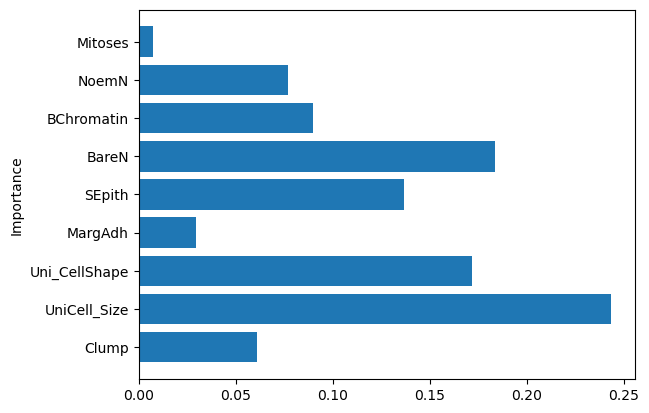

In [5]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=True)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

For comparison

In [6]:
from sklearn.tree import DecisionTreeClassifier


dtc =DecisionTreeClassifier(random_state=23)
params = {'max_depth':[3, 4, 5, 6], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,3,5,7,10,15]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(dtc, param_grid=params, scoring='neg_log_loss', cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
-0.25134111620337896


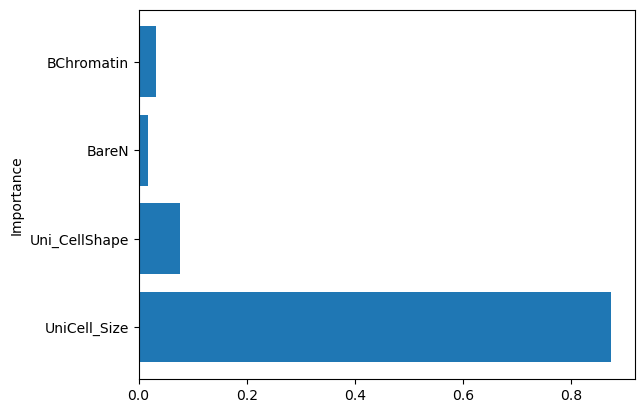

In [7]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=True)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()